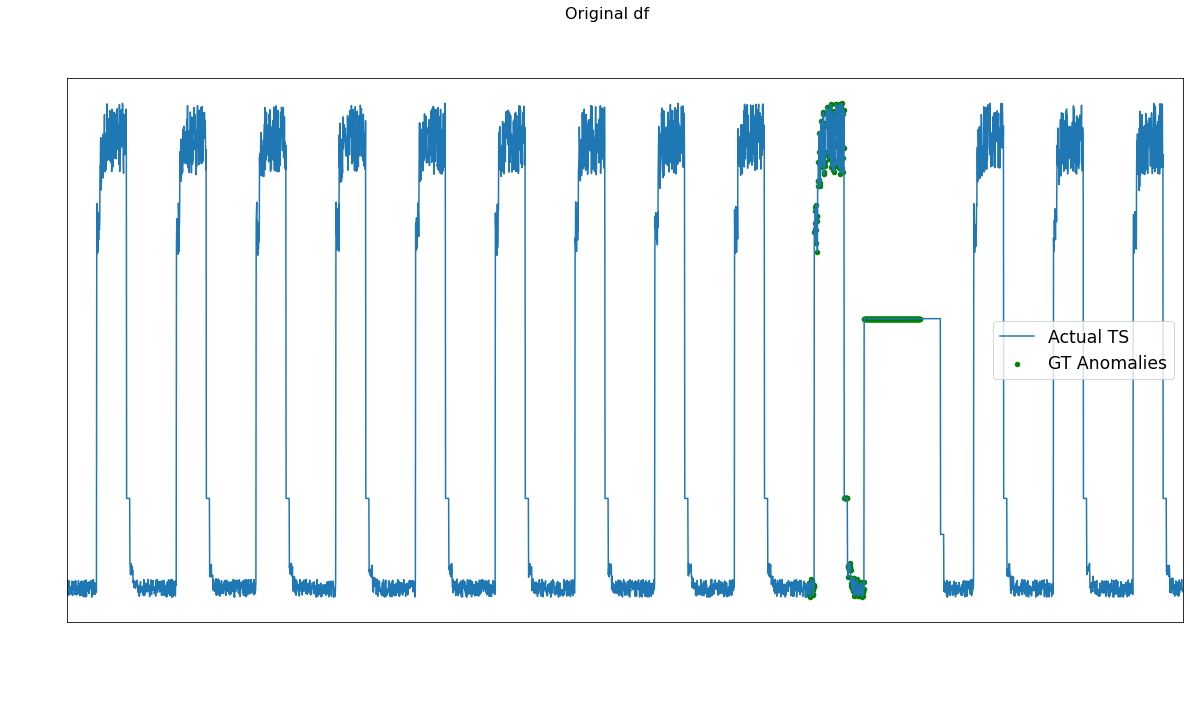

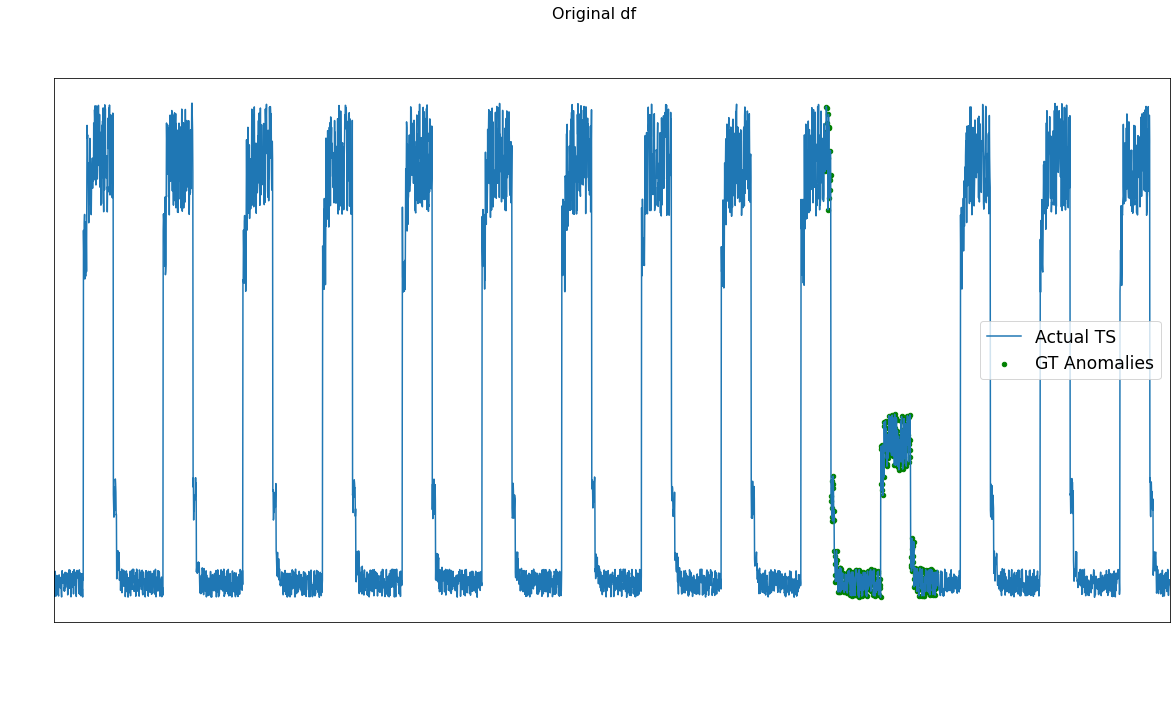

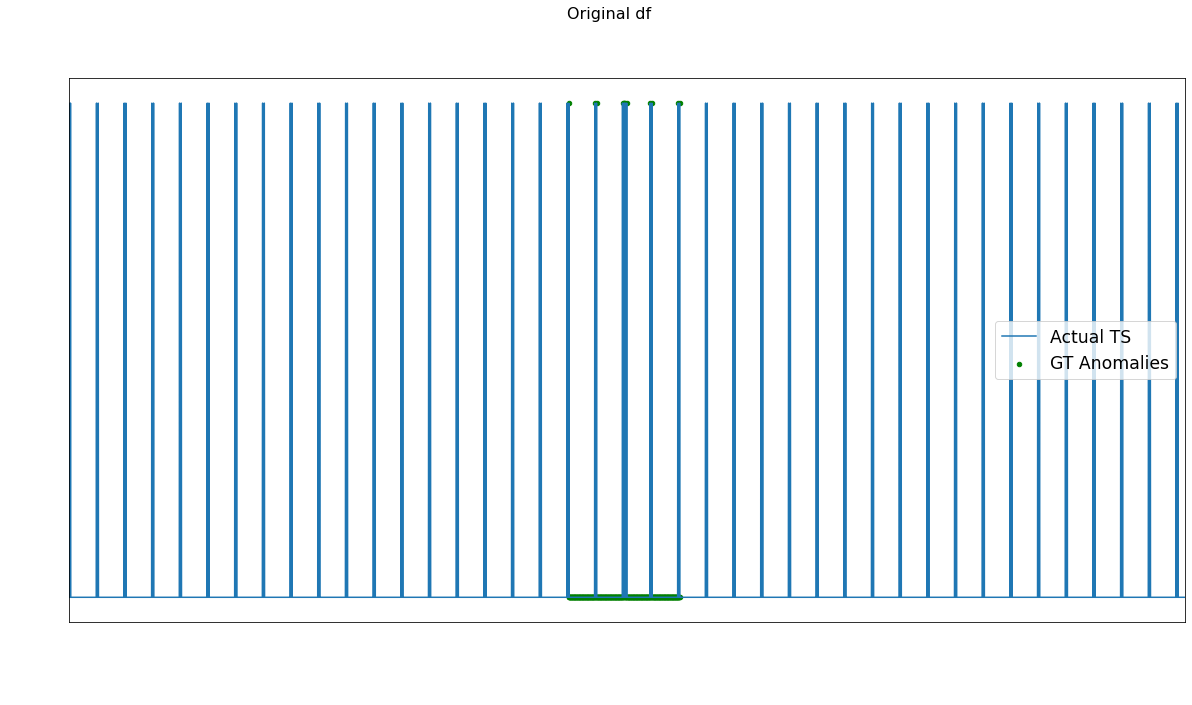

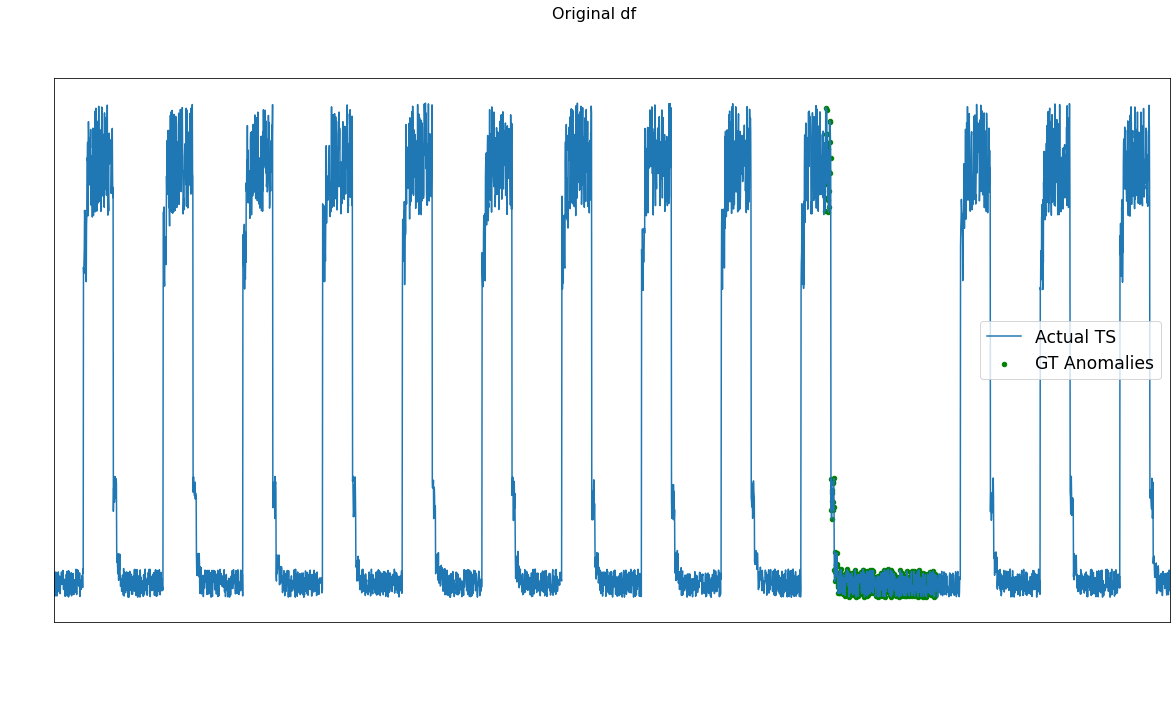

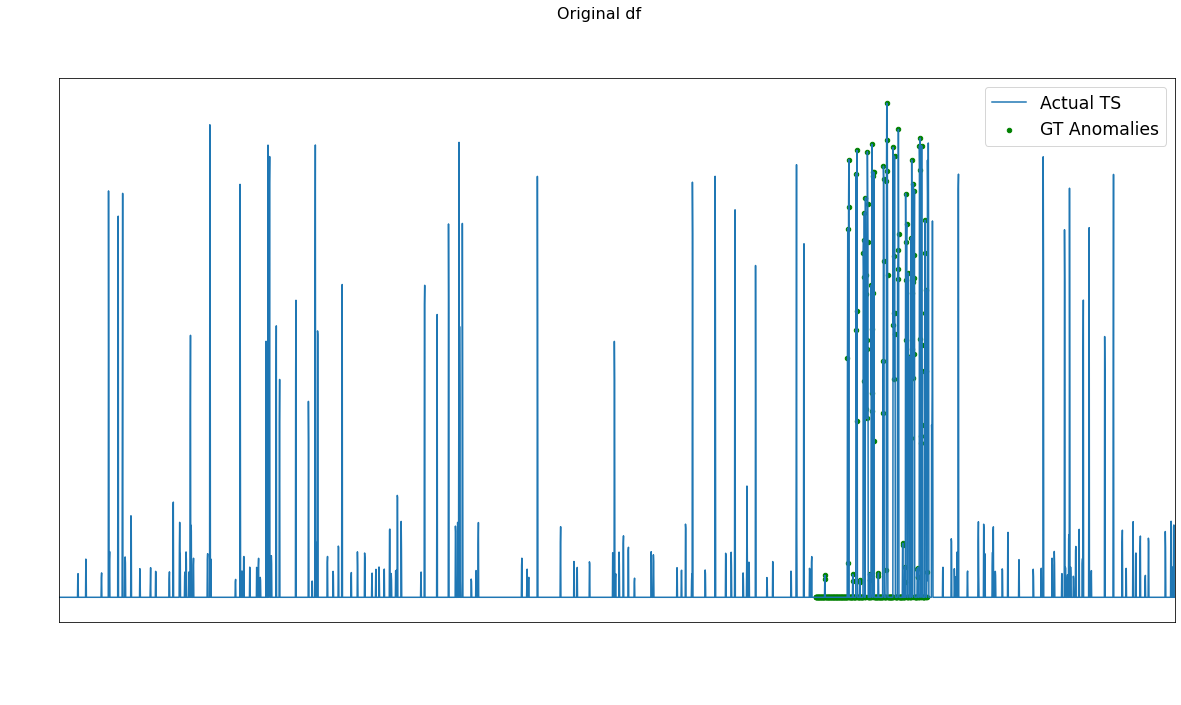

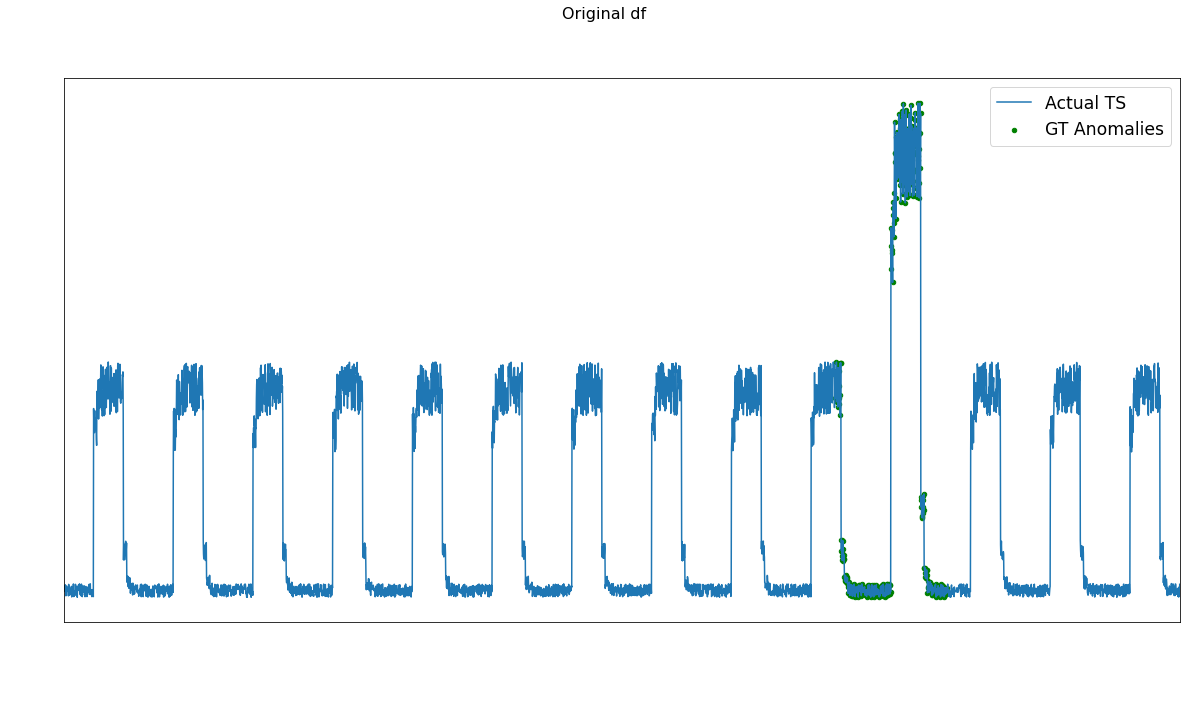

In [18]:
import importlib
import json
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from kad.visualization import visualization
from kad.kad_utils import kad_utils
from kad.ts_analyzer import ts_analyzer
visualization = importlib.reload(visualization)

kad_utils.customize_matplotlib()

plots_dir = "data/archive/plots"

data_dir = "data/archive/"
file_dir = "artificialWithAnomaly"
# file_dir = "realKnownCause"
file_names = os.listdir(os.path.join(data_dir, file_dir, file_dir))

for file_name in file_names:
    file_path = os.path.join(data_dir, file_dir, file_dir, file_name)

    original_df = pd.read_csv(
        file_path, parse_dates=True, index_col="timestamp"
    )

    # original_df = original_df[:int(len(original_df)/2)].resample("h").agg(np.mean)
    # original_df = original_df.resample("h").agg(np.mean)

    with open("data/archive/combined_windows.json") as f:
        true_anomalies = json.load(f)

    X_LABEL = "timestamp"
    ts_analyzer = importlib.reload(ts_analyzer)

    true_anomalies_ranges = true_anomalies[os.path.join(file_dir, file_name)]

    ground_true_anomalies_df = pd.DataFrame()
    for anom_range in true_anomalies_ranges:
        ground_true_anomalies_df = ground_true_anomalies_df.append(original_df.loc[anom_range[0]:anom_range[1]])

    preprocessed_df = original_df.copy()
    preprocessed_df["gt_is_anomaly"] = [idx in ground_true_anomalies_df.index  for idx in original_df.index.tolist()]

    fig = visualization.visualize(results_df=preprocessed_df, metric_name="value", title="Original df")

    fig_filepath = os.path.join(plots_dir, file_name.split(".")[0])
    plt.savefig(fig_filepath)
    # fig.show()